In [29]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from textblob import TextBlob
from nltk.corpus import stopwords
from textblob import Word
import re
import nltk
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import malaya
import warnings
warnings.filterwarnings("ignore")

# Data collection

Steps:
    
1.Get all user's username who gave a review

2.Get the user's review


# Preprocessing steps(data cleaning)

1.Convert words to lower case

2.Remove punctuations

3.Remove stop words


In [3]:
request=requests.get('https://www.goodreads.com/book/show/57456461-politik-untuk-pemula')

In [4]:
soup=BeautifulSoup(request.content,'html.parser')

#### Getting user's username

In [5]:
usernames=soup.select('a.user')
usernames

[<a class="user" href="/user/show/41793634-mamluk-qayser" itemprop="url" name="Mamluk Qayser" title="Mamluk Qayser">Mamluk Qayser</a>,
 <a class="user" href="/user/show/117908043-nadia" itemprop="url" name="Nadia" title="Nadia">Nadia</a>,
 <a class="user" href="/user/show/5298936-zaghol" itemprop="url" name="Zaghol" title="Zaghol">Zaghol</a>,
 <a class="user" href="/user/show/69324560-bayuu-haikalson" itemprop="url" name="Bayuu Haikalson" title="Bayuu Haikalson">Bayuu Haikalson</a>,
 <a class="user" href="/user/show/91426932-izhaq-sam" itemprop="url" name="Izhaq Sam" title="Izhaq Sam">Izhaq Sam</a>,
 <a class="user" href="/user/show/9098161-muiz" itemprop="url" name="Muiz " title="Muiz ">Muiz </a>,
 <a class="user" href="/user/show/63353742-hanz-jamaludin" itemprop="url" name="Hanz Jamaludin" title="Hanz Jamaludin">Hanz Jamaludin</a>,
 <a class="user" href="/user/show/60288028-haizal" itemprop="url" name="Haizal" title="Haizal">Haizal</a>,
 <a class="user" href="/user/show/55871999-had

In [6]:
user_username=[user.string for user in usernames]
user_username

['Mamluk Qayser',
 'Nadia',
 'Zaghol',
 'Bayuu Haikalson',
 'Izhaq Sam',
 'Muiz ',
 'Hanz Jamaludin',
 'Haizal',
 'Hadi Muss',
 'Zu Y',
 'Baihaqi Mohamad',
 'MUHAMMAD NABIHAN',
 'Khairul Bakar',
 'Muhammad Syazani',
 'Roslan  Abd Latib',
 'Rashidi',
 'Zamri Misman',
 'Syafiq Suib',
 'Siti Shakira Suhaimi',
 'Hafizuddin Hanaffi',
 'Daniel Hakim',
 'Akramin',
 'Hafiz Zawawi',
 'Shaharuddin',
 'Cengkh Ggiblon',
 'Mohamad Danial',
 'Mrtn',
 'Nafsiah Mahmud',
 'aisyahJ',
 'Irfan']

#### Getting the user's reviews

In [7]:
reviews=soup.select('div#reviews span.readable [style="display:none"]')
reviews

[<span id="freeText6656474516239242614" style="display:none">To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in the right time.<br/><br/>And so, in this book, lo and behold, he bared his fangs for the first time. As the title of the book suggests, this volume is supposed to be a starting primer for anybody who wished to dabble in current political issues as learned sleuths, rather than rampant ideologues we normally see hiding behind anonymous accounts in Facebook. I was quite surprised with the vast breadth and scope of the writing with the auth

In [8]:
for x in reviews:
    print(x.text)
    print('----')

To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in the right time.And so, in this book, lo and behold, he bared his fangs for the first time. As the title of the book suggests, this volume is supposed to be a starting primer for anybody who wished to dabble in current political issues as learned sleuths, rather than rampant ideologues we normally see hiding behind anonymous accounts in Facebook. I was quite surprised with the vast breadth and scope of the writing with the author managed to deliver a concise and apt summary on notable key concepts

In [9]:
user_reviews=[reviews.text for reviews in reviews]
user_reviews

["To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in the right time.And so, in this book, lo and behold, he bared his fangs for the first time. As the title of the book suggests, this volume is supposed to be a starting primer for anybody who wished to dabble in current political issues as learned sleuths, rather than rampant ideologues we normally see hiding behind anonymous accounts in Facebook. I was quite surprised with the vast breadth and scope of the writing with the author managed to deliver a concise and apt summary on notable key concep

##### This wasn't a very good approach since not all reviews were scraped. Maybe the css selectors we specified was too specific. These are the reviews that wasn't able to be scraped.

In [10]:
reviews=soup.select('div.reviewText.stacked')
reviews

[<div class="reviewText stacked">
 <span class="readable" id="reviewTextContainer3906279773">
 <span id="freeTextContainer6656474516239242614">To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in t</span>
 <span id="freeText6656474516239242614" style="display:none">To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length 

In [12]:
for x in reviews:
    print(x.text)
    print('---')



To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in t
To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed i

In [13]:
User_reviews=[user.text.strip('\n') for user in reviews]
User_reviews

["To be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed in t\nTo be honest, I was quite disappointed with the first and second editions of World Without Walls by the author, which was purely a compilation from his Facebook posts on current political issues. While of course, everybody knows that the volumes would be a compilation than a full-length writing, I was still hoping for extra and in depth commentary beyond mere untangling of the events. But we all know from his writings that the author has something he kept in store within him to be unleashed 

#### Making dataframe

In [14]:
user_username=pd.Series(user_username)
user_reviews=pd.Series(User_reviews)

In [15]:
user_username

0            Mamluk Qayser
1                    Nadia
2                   Zaghol
3          Bayuu Haikalson
4                Izhaq Sam
5                    Muiz 
6           Hanz Jamaludin
7                   Haizal
8                Hadi Muss
9                     Zu Y
10         Baihaqi Mohamad
11        MUHAMMAD NABIHAN
12           Khairul Bakar
13        Muhammad Syazani
14       Roslan  Abd Latib
15                 Rashidi
16            Zamri Misman
17             Syafiq Suib
18    Siti Shakira Suhaimi
19      Hafizuddin Hanaffi
20            Daniel Hakim
21                 Akramin
22            Hafiz Zawawi
23             Shaharuddin
24          Cengkh Ggiblon
25          Mohamad Danial
26                    Mrtn
27          Nafsiah Mahmud
28                 aisyahJ
29                   Irfan
dtype: object

In [16]:
user_reviews

0     To be honest, I was quite disappointed with th...
1     Buku ini merangkumi 26 bab konsep-konsep asas ...
2     Seusai membaca kitab ini, terasa bersemangat i...
3     Terasa macam baca buku Sejarah dan Pengajian A...
4     A very well written book for laymen who want t...
5     Akhirnya. Sebuah bahan bacaan tentang konsep d...
6     3.8 RatingSerasa mengulang baca buku sejarah d...
7     Penulis menulis perihal terma asas dalam dunia...
8     Puas baca karya ARW yang disifatkan sebagai ma...
9     Pembelian buku pertama dari patriotstore.Buku ...
10    Buku Masterpiece kalau nak faham perkara-perka...
11    Alhamdulillah puas membaca karya terbaru darip...
12    Buku yang cukup menarik untuk dibaca. Sesuai u...
13    Buku yang baik untuk memahami bentuk-bentuk si...
14    Setelah membaca buku ini sedikit kebimbangan m...
15                        This review has been hidde...
16    Good info as introduction to political science...
17    Ayman Rashdan Wong telah berjaya mengubah 

In [17]:
df=pd.concat([user_username,user_reviews],axis=1)
df

,0,1
0,Mamluk Qayser,"To be honest, I was quite disappointed with th..."
1,Nadia,Buku ini merangkumi 26 bab konsep-konsep asas ...
2,Zaghol,"Seusai membaca kitab ini, terasa bersemangat i..."
3,Bayuu Haikalson,Terasa macam baca buku Sejarah dan Pengajian A...
4,Izhaq Sam,A very well written book for laymen who want t...
5,Muiz,Akhirnya. Sebuah bahan bacaan tentang konsep d...
6,Hanz Jamaludin,3.8 RatingSerasa mengulang baca buku sejarah d...
7,Haizal,Penulis menulis perihal terma asas dalam dunia...
8,Hadi Muss,Puas baca karya ARW yang disifatkan sebagai ma...
9,Zu Y,Pembelian buku pertama dari patriotstore.Buku ...


In [18]:
df.columns=['username','reviews']
df

,username,reviews
0,Mamluk Qayser,"To be honest, I was quite disappointed with th..."
1,Nadia,Buku ini merangkumi 26 bab konsep-konsep asas ...
2,Zaghol,"Seusai membaca kitab ini, terasa bersemangat i..."
3,Bayuu Haikalson,Terasa macam baca buku Sejarah dan Pengajian A...
4,Izhaq Sam,A very well written book for laymen who want t...
5,Muiz,Akhirnya. Sebuah bahan bacaan tentang konsep d...
6,Hanz Jamaludin,3.8 RatingSerasa mengulang baca buku sejarah d...
7,Haizal,Penulis menulis perihal terma asas dalam dunia...
8,Hadi Muss,Puas baca karya ARW yang disifatkan sebagai ma...
9,Zu Y,Pembelian buku pertama dari patriotstore.Buku ...


Since the last 2 reviews only left a rating, so we will dropping those rows

In [19]:
df.iloc[-2:]

,username,reviews
28,aisyahJ,NaN
29,Irfan,NaN


In [20]:
df=df.iloc[:-2]
df

,username,reviews
0,Mamluk Qayser,"To be honest, I was quite disappointed with th..."
1,Nadia,Buku ini merangkumi 26 bab konsep-konsep asas ...
2,Zaghol,"Seusai membaca kitab ini, terasa bersemangat i..."
3,Bayuu Haikalson,Terasa macam baca buku Sejarah dan Pengajian A...
4,Izhaq Sam,A very well written book for laymen who want t...
5,Muiz,Akhirnya. Sebuah bahan bacaan tentang konsep d...
6,Hanz Jamaludin,3.8 RatingSerasa mengulang baca buku sejarah d...
7,Haizal,Penulis menulis perihal terma asas dalam dunia...
8,Hadi Muss,Puas baca karya ARW yang disifatkan sebagai ma...
9,Zu Y,Pembelian buku pertama dari patriotstore.Buku ...


# Preprocessing text(data cleaning)

Preprocessing steps(data cleaning)


1.Convert words to lower case

2.Remove punctuations

3.Remove stop words

#### Converting reviews to lower case

In [22]:
df['reviews']=df['reviews'].apply(lambda x:x.lower())
df

,username,reviews
0,Mamluk Qayser,"to be honest, i was quite disappointed with th..."
1,Nadia,buku ini merangkumi 26 bab konsep-konsep asas ...
2,Zaghol,"seusai membaca kitab ini, terasa bersemangat i..."
3,Bayuu Haikalson,terasa macam baca buku sejarah dan pengajian a...
4,Izhaq Sam,a very well written book for laymen who want t...
5,Muiz,akhirnya. sebuah bahan bacaan tentang konsep d...
6,Hanz Jamaludin,3.8 ratingserasa mengulang baca buku sejarah d...
7,Haizal,penulis menulis perihal terma asas dalam dunia...
8,Hadi Muss,puas baca karya arw yang disifatkan sebagai ma...
9,Zu Y,pembelian buku pertama dari patriotstore.buku ...


#### Removing punctuation

In [23]:
df['reviews']=df['reviews'].str.replace('[^\w\s]','')
df

,username,reviews
0,Mamluk Qayser,to be honest i was quite disappointed with the...
1,Nadia,buku ini merangkumi 26 bab konsepkonsep asas d...
2,Zaghol,seusai membaca kitab ini terasa bersemangat in...
3,Bayuu Haikalson,terasa macam baca buku sejarah dan pengajian a...
4,Izhaq Sam,a very well written book for laymen who want t...
5,Muiz,akhirnya sebuah bahan bacaan tentang konsep da...
6,Hanz Jamaludin,38 ratingserasa mengulang baca buku sejarah du...
7,Haizal,penulis menulis perihal terma asas dalam dunia...
8,Hadi Muss,puas baca karya arw yang disifatkan sebagai ma...
9,Zu Y,pembelian buku pertama dari patriotstorebuku n...


#### Removing stop words


In [24]:
stop=stopwords.words('English')

First,split the words

In [25]:
example=df['reviews'][0]
example

'to be honest i was quite disappointed with the first and second editions of world without walls by the author which was purely a compilation from his facebook posts on current political issues while of course everybody knows that the volumes would be a compilation than a fulllength writing i was still hoping for extra and in depth commentary beyond mere untangling of the events but we all know from his writings that the author has something he kept in store within him to be unleashed in t\nto be honest i was quite disappointed with the first and second editions of world without walls by the author which was purely a compilation from his facebook posts on current political issues while of course everybody knows that the volumes would be a compilation than a fulllength writing i was still hoping for extra and in depth commentary beyond mere untangling of the events but we all know from his writings that the author has something he kept in store within him to be unleashed in the right ti

Split the paragraph into list, then take the words which are not stop words

In [26]:
example=[word for word in example.split() if word not in stop]
example

['honest',
 'quite',
 'disappointed',
 'first',
 'second',
 'editions',
 'world',
 'without',
 'walls',
 'author',
 'purely',
 'compilation',
 'facebook',
 'posts',
 'current',
 'political',
 'issues',
 'course',
 'everybody',
 'knows',
 'volumes',
 'would',
 'compilation',
 'fulllength',
 'writing',
 'still',
 'hoping',
 'extra',
 'depth',
 'commentary',
 'beyond',
 'mere',
 'untangling',
 'events',
 'know',
 'writings',
 'author',
 'something',
 'kept',
 'store',
 'within',
 'unleashed',
 'honest',
 'quite',
 'disappointed',
 'first',
 'second',
 'editions',
 'world',
 'without',
 'walls',
 'author',
 'purely',
 'compilation',
 'facebook',
 'posts',
 'current',
 'political',
 'issues',
 'course',
 'everybody',
 'knows',
 'volumes',
 'would',
 'compilation',
 'fulllength',
 'writing',
 'still',
 'hoping',
 'extra',
 'depth',
 'commentary',
 'beyond',
 'mere',
 'untangling',
 'events',
 'know',
 'writings',
 'author',
 'something',
 'kept',
 'store',
 'within',
 'unleashed',
 'right',


In [27]:
df['reviews']=df['reviews'].apply(lambda x:' '.join(review for review in x.split() if review not in stop))
df['reviews']

0     honest quite disappointed first second edition...
1     buku ini merangkumi 26 bab konsepkonsep asas d...
2     seusai membaca kitab ini terasa bersemangat in...
3     terasa macam baca buku sejarah dan pengajian t...
4     well written book laymen want start learning p...
5     akhirnya sebuah bahan bacaan tentang konsep da...
6     38 ratingserasa mengulang baca buku sejarah du...
7     penulis menulis perihal terma asas dalam dunia...
8     puas baca karya arw yang disifatkan sebagai ma...
9     pembelian buku pertama dari patriotstorebuku n...
10    buku masterpiece kalau nak faham perkaraperkar...
11    alhamdulillah puas membaca karya terbaru darip...
12    buku yang cukup menarik untuk dibaca sesuai un...
13    buku yang baik untuk memahami bentukbentuk sis...
14    setelah membaca buku ini sedikit kebimbangan m...
15    review hidden contains spoilers view click pen...
16    good info introduction political science malay...
17    ayman rashdan wong telah berjaya mengubah 

Now all the stop words are removed.

In [28]:
df['reviews'][0]

'honest quite disappointed first second editions world without walls author purely compilation facebook posts current political issues course everybody knows volumes would compilation fulllength writing still hoping extra depth commentary beyond mere untangling events know writings author something kept store within unleashed honest quite disappointed first second editions world without walls author purely compilation facebook posts current political issues course everybody knows volumes would compilation fulllength writing still hoping extra depth commentary beyond mere untangling events know writings author something kept store within unleashed right timeand book lo behold bared fangs first time title book suggests volume supposed starting primer anybody wished dabble current political issues learned sleuths rather rampant ideologues normally see hiding behind anonymous accounts facebook quite surprised vast breadth scope writing author managed deliver concise apt summary notable key

# Exploring text data

#### Checking the frequency of words in our reviews


We would need to tokenize the words in each review rows. Then just use value counts to calculate the frequencies of the words.

In [36]:
df['reviews'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
0,honest,quite,disappointed,first,second,editions,world,without,walls,author,...,None,None,None,None,None,None,None,None,None,None
1,buku,ini,merangkumi,26,bab,konsepkonsep,asas,dalam,sains,politik,...,None,None,None,None,None,None,None,None,None,None
2,seusai,membaca,kitab,ini,terasa,bersemangat,ingin,bangkit,melakukan,revolusi,...,None,None,None,None,None,None,None,None,None,None
3,terasa,macam,baca,buku,sejarah,dan,pengajian,tingkatan,enam,je,...,None,None,None,None,None,None,None,None,None,None
4,well,written,book,laymen,want,start,learning,politics,rest,assured,...,None,None,None,None,None,None,None,None,None,None
5,akhirnya,sebuah,bahan,bacaan,tentang,konsep,dan,ilmu,politik,untuk,...,None,None,None,None,None,None,None,None,None,None
6,38,ratingserasa,mengulang,baca,buku,sejarah,dunia,sejarah,malaysia,dan,...,None,None,None,None,None,None,None,None,None,None
7,penulis,menulis,perihal,terma,asas,dalam,dunia,politik,seperti,liberalisme,...,None,None,None,None,None,None,None,None,None,None
8,puas,baca,karya,arw,yang,disifatkan,sebagai,mahakarya,oleh,beliau,...,None,None,None,None,None,None,None,None,None,None
9,pembelian,buku,pertama,dari,patriotstorebuku,ni,explained,simple,details,tentang,...,None,None,None,None,None,None,None,None,None,None


In [37]:
df['reviews'].str.split(expand=True).stack()

0   0           honest
    1            quite
    2     disappointed
    3            first
    4           second
              ...     
27  21           faham
    22         situasi
    23          semasa
    24           macam
    25            mana
Length: 3148, dtype: object

In [38]:
word_frequency=pd.Series(df['reviews'].str.split(expand=True).stack().value_counts())
word_frequency

politik     122
dan         119
yang         91
buku         67
untuk        60
           ... 
naskah        1
dabble        1
think         1
spawning      1
common        1
Length: 1035, dtype: int64

In [39]:
word_frequency[:30]

politik     122
dan         119
yang         91
buku         67
untuk        60
ini          44
aku          38
dengan       38
dalam        33
di           27
ada          26
tentang      25
ideologi     22
negara       21
asas         20
juga         20
baca         20
ni           19
sejarah      18
mudah        17
penulis      17
masa         17
memahami     15
seperti      15
tidak        15
itu          14
dunia        14
kepada       14
akan         14
banyak       13
dtype: int64

Here we can see that important words like 'ideologi' and 'sejarah' are amongst the most common words used which implies the author does focuses more on the 'sejarah' and background of certain topics. Not only that but the book also defines many 'ideologi' and bringing the context of it by explaining the 'sejarah' or background about it. This is a very good approach to explain such topics.

Text(0, 0.5, 'Words')

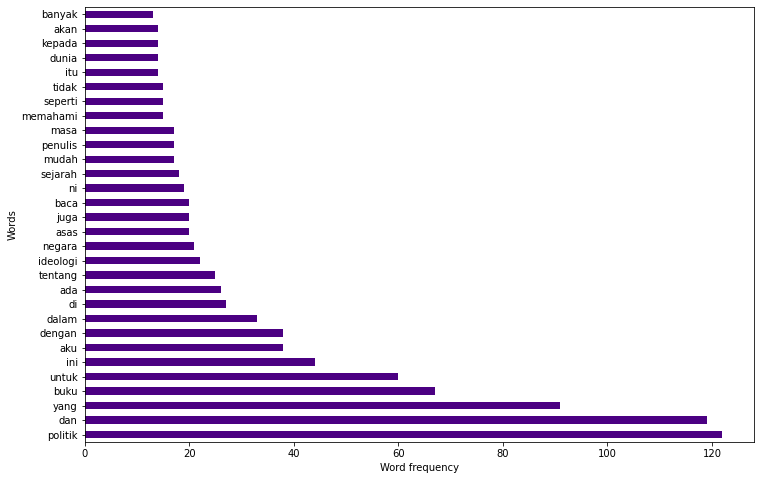

In [40]:
plt.figure(figsize=(12,8))
word_frequency[:30].plot(kind='barh',color='indigo')
plt.xlabel('Word frequency')
plt.ylabel('Words')

# Building wordcloud


Concatenate the reviews as the word cloud function takes in a concatenated input text


In [41]:
temp_review=''.join(df['reviews'])
temp_review

'honest quite disappointed first second editions world without walls author purely compilation facebook posts current political issues course everybody knows volumes would compilation fulllength writing still hoping extra depth commentary beyond mere untangling events know writings author something kept store within unleashed honest quite disappointed first second editions world without walls author purely compilation facebook posts current political issues course everybody knows volumes would compilation fulllength writing still hoping extra depth commentary beyond mere untangling events know writings author something kept store within unleashed right timeand book lo behold bared fangs first time title book suggests volume supposed starting primer anybody wished dabble current political issues learned sleuths rather rampant ideologues normally see hiding behind anonymous accounts facebook quite surprised vast breadth scope writing author managed deliver concise apt summary notable key

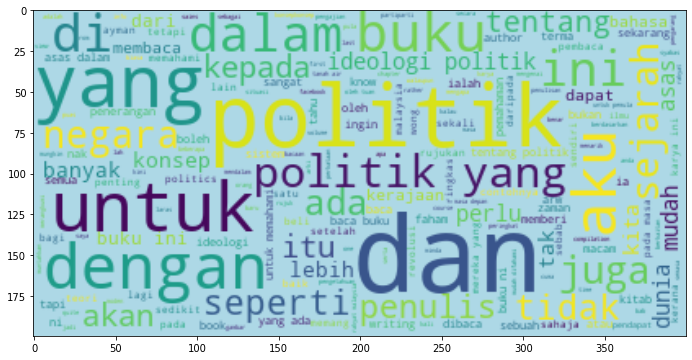

In [43]:
plt.figure(figsize=(12,6))
wordcloud=WordCloud(background_color='lightblue').generate(temp_review)
plt.imshow(wordcloud,interpolation='bilinear')

# Sentiment analysis

We will be using the model from Malaya to classify these reviews into positive and negative reviews

In [76]:
model=malaya.sentiment.multinomial()

Since the model accepts a list, we will apply the function to predict the sentiment for each row

In [110]:
df.drop('sentiment',axis=1,inplace=True)

In [111]:
df['sentiment']=df['reviews'].apply(lambda x:model.predict([x]))

In [112]:
df

,username,reviews,sentiment
0,Mamluk Qayser,honest quite disappointed first second edition...,[positive]
1,Nadia,buku ini merangkumi 26 bab konsepkonsep asas d...,[neutral]
2,Zaghol,seusai membaca kitab ini terasa bersemangat in...,[negative]
3,Bayuu Haikalson,terasa macam baca buku sejarah dan pengajian t...,[negative]
4,Izhaq Sam,well written book laymen want start learning p...,[positive]
5,Muiz,akhirnya sebuah bahan bacaan tentang konsep da...,[neutral]
6,Hanz Jamaludin,38 ratingserasa mengulang baca buku sejarah du...,[neutral]
7,Haizal,penulis menulis perihal terma asas dalam dunia...,[neutral]
8,Hadi Muss,puas baca karya arw yang disifatkan sebagai ma...,[neutral]
9,Zu Y,pembelian buku pertama dari patriotstorebuku n...,[positive]


Removing list from each rows:https://stackoverflow.com/questions/45086985/removing-lists-from-each-cell-in-pandas-dataframe

In [106]:
df['sentiment'].str[0]

0     positive
1      neutral
2     negative
3     negative
4     positive
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10     neutral
11    negative
12     neutral
13    negative
14    negative
15    negative
16    positive
17    negative
18    negative
19    negative
20    negative
21    negative
22     neutral
23     neutral
24    negative
25    negative
26    negative
27     neutral
Name: sentiment, dtype: object

In [113]:
df['sentiment']=df['sentiment'].str[0]
df

,username,reviews,sentiment
0,Mamluk Qayser,honest quite disappointed first second edition...,positive
1,Nadia,buku ini merangkumi 26 bab konsepkonsep asas d...,neutral
2,Zaghol,seusai membaca kitab ini terasa bersemangat in...,negative
3,Bayuu Haikalson,terasa macam baca buku sejarah dan pengajian t...,negative
4,Izhaq Sam,well written book laymen want start learning p...,positive
5,Muiz,akhirnya sebuah bahan bacaan tentang konsep da...,neutral
6,Hanz Jamaludin,38 ratingserasa mengulang baca buku sejarah du...,neutral
7,Haizal,penulis menulis perihal terma asas dalam dunia...,neutral
8,Hadi Muss,puas baca karya arw yang disifatkan sebagai ma...,neutral
9,Zu Y,pembelian buku pertama dari patriotstorebuku n...,positive


In [130]:
sentiment=df['sentiment'].value_counts()
sentiment

negative    14
neutral     10
positive     4
Name: sentiment, dtype: int64

Looks like most reviews are negative.

<AxesSubplot:ylabel='sentiment'>

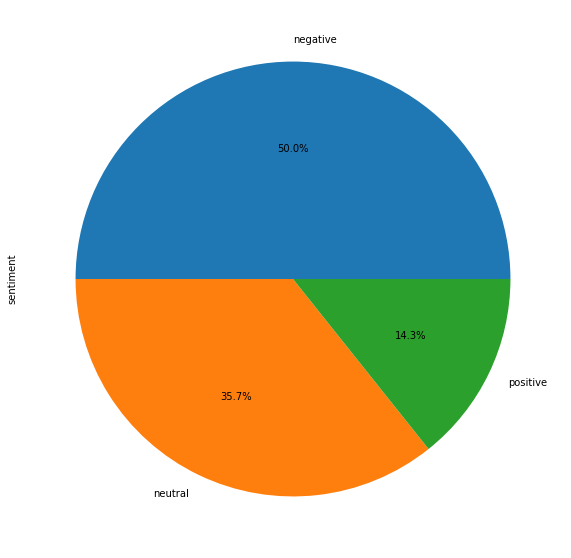

In [143]:
sentiment.plot(kind='pie',autopct='%1.1f%%',figsize=(15,10))

# Segment the reviews based on their sentiment

In [171]:
import random

In [154]:
positive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']
neutral_reviews=df[df['sentiment']=='neutral']

In [180]:
colour=['green','yellow','red']

In [192]:
labels=['Positive reviews','Negative reviews','Neutral reviews']

Function to plot words frequency and wordcloud

In [194]:
def words_frequency(dataframe):
    word_frequency=pd.Series(dataframe['reviews']).str.split(expand=True).stack().value_counts()
    word_frequency
   
    
    plt.figure(figsize=(12,8))
    word_frequency[:30].plot(kind='barh',color=random.choice(colour))
    plt.xlabel('Word frequency')
    plt.ylabel('Words')
    
    temp_review=''.join(dataframe['reviews'])
    
    plt.figure(figsize=(12,6))
    wordcloud=WordCloud(background_color='lightblue').generate(temp_review)
    plt.imshow(wordcloud,interpolation='bilinear')
    

# Positive reviews

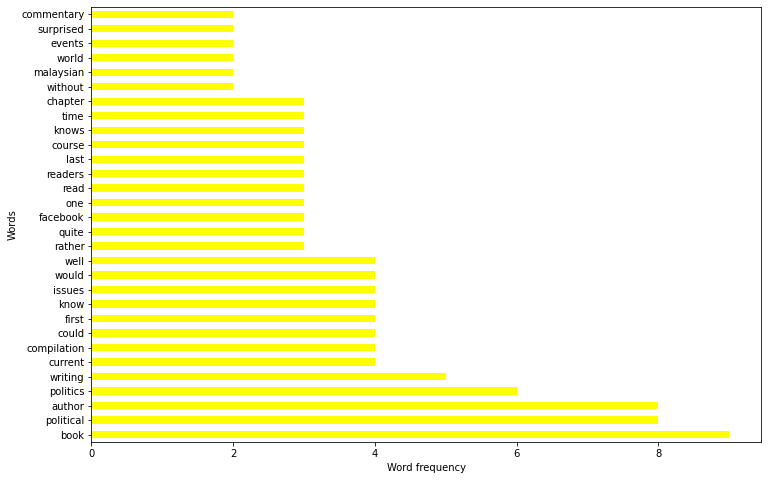

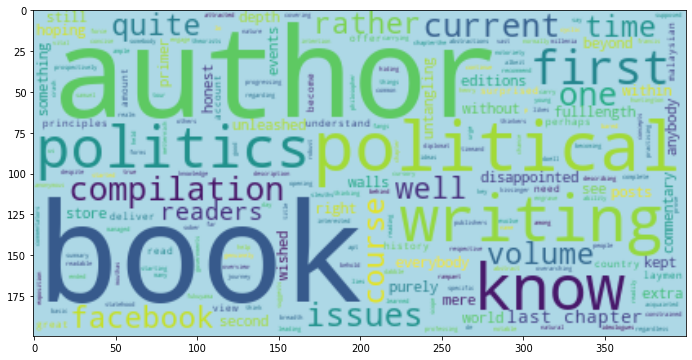

In [187]:
words_frequency(positive_reviews)

Here we can see that positive reviews uses the word author a lot of times, which implies positive reviewers mention a lot about the author compare to negative reviewers.

# Negative reviews

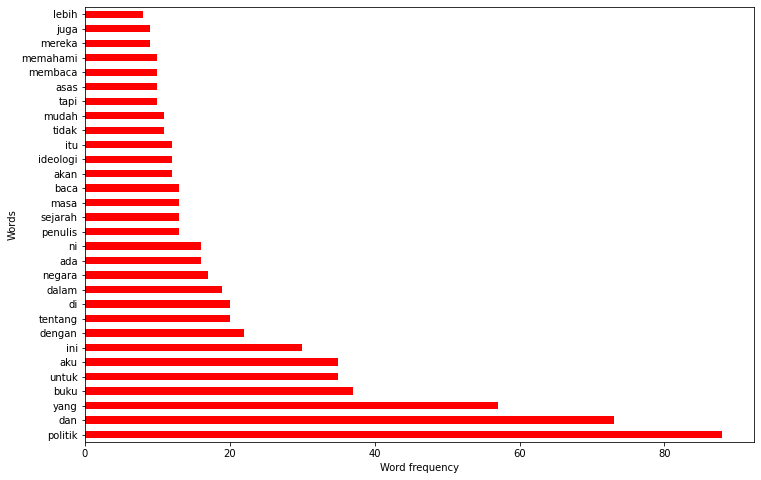

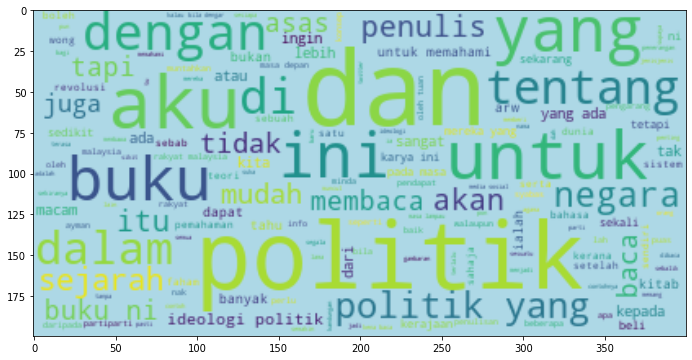

In [188]:
words_frequency(negative_reviews)

Here we can infer that most negative reviews are labelled as negative because the reviews tend to have the word 'politik'

# Neutral reviews

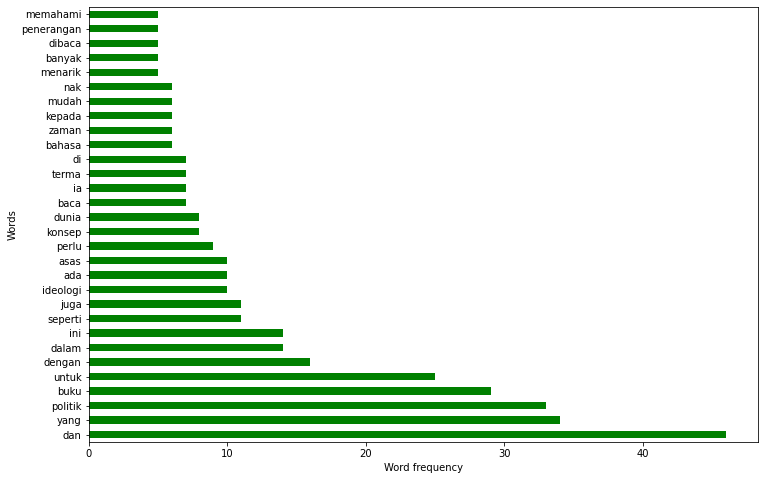

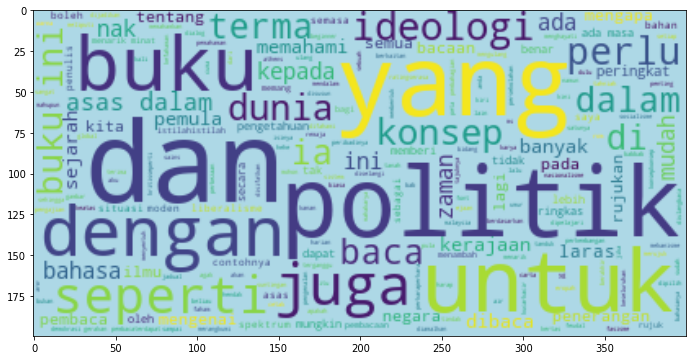

In [191]:
words_frequency(neutral_reviews)

Here we can conclude that neutral reviewers does not really talk or mention about the author himself. The word 'politik' is also commonly used by neutral reviewers but lesser than negative reviewers.